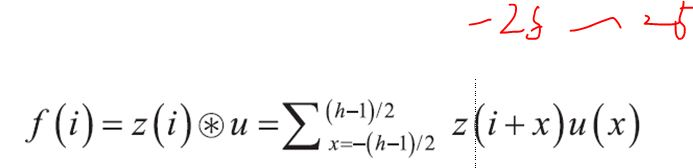

In [1]:
# 컨볼류션 신경망은 딥러닝에서 가장 성공한 모델
# 자율주행, 딥드림, 영상 주석, 병변부위 찾기
# 컨볼류션연산
# 특징 추출 또는 신호변환에 이용
# 수용장(파란부분)과 커널의 선형 결합식
# z는 입력신호, u는 커널, h는 커널의 크기
from IPython import display
display.Image('E:/1 강남야간/img/025.jpg',width=500, height=500)

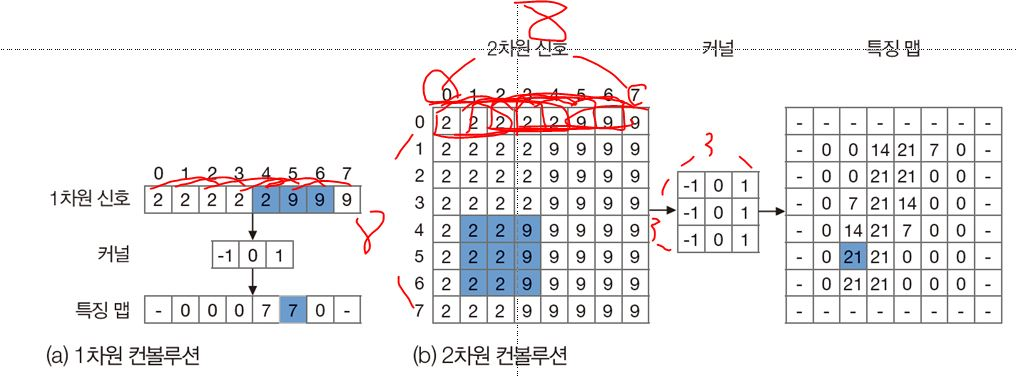

In [2]:
display.Image('E:/1 강남야간/img/026.jpg',width=500, height=500)

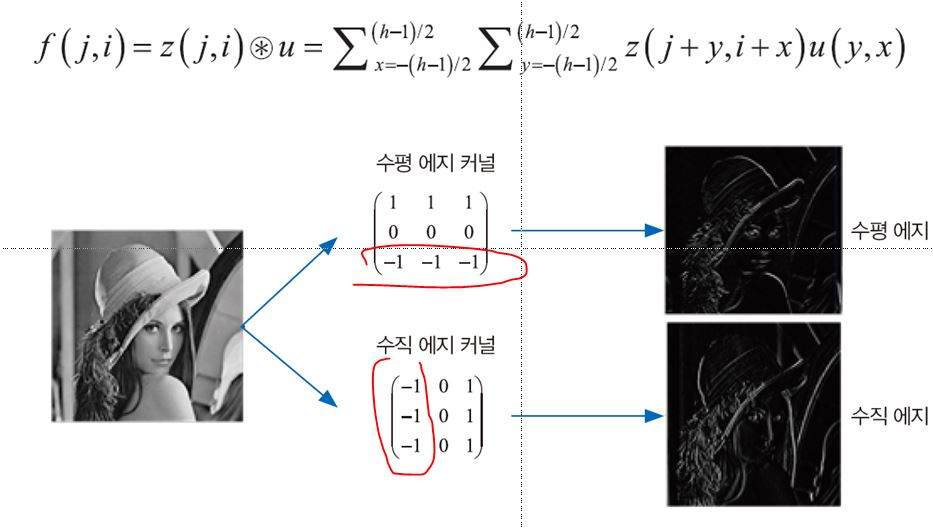

In [3]:
display.Image('E:/1 강남야간/img/027.jpg',width=500, height=500)

In [4]:
# 컨볼류션의 특징
# 커널에 따라서 특징 맵을 추출해 줌 - 수평에지 수직에지
# 원본영상과 같은 크기의 특징 맵 생성
# 원본영상 자체에 연산을 적용 - 정보손실이 없음

In [5]:
# 표준컨볼류션에 몇가지 아이디어를 추가
# 특징 맵이 작아지는 문제해결 덧대기
# 영상크기를 축소 할수 있는 보폭(k로 설정하면 1/k로 줄어듦)
# 바이어스 추가

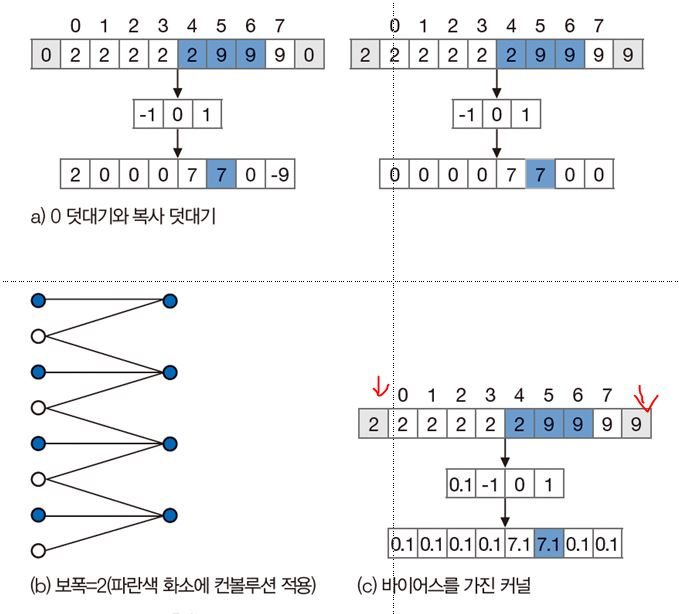

In [6]:
display.Image('E:/1 강남야간/img/028.jpg',width=500, height=500)

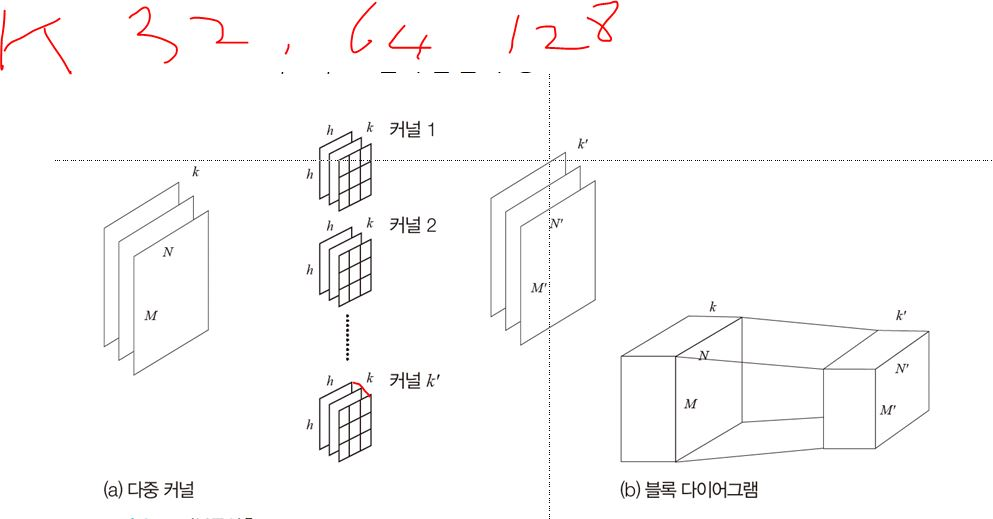

In [8]:
#컨볼류션층과 폴링층... 다중 커널
display.Image('E:/1 강남야간/img/029.jpg',width=500, height=500)

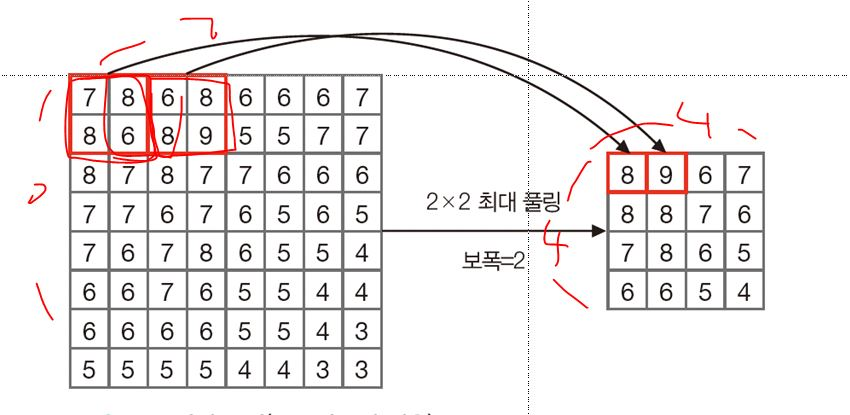

In [9]:
# 폴링층
# 최대 폴링은 커널 안에 있는 화소중에 최대값을 취함(평균폴링은 평균)
# 특징맵에 있는 지나친 상세함을 줄여 요약 통계량을 추출
# 보폭을 s로 하면 특징 맵은 s배만큼 줄어듦
display.Image('E:/1 강남야간/img/030.jpg',width=500, height=500)

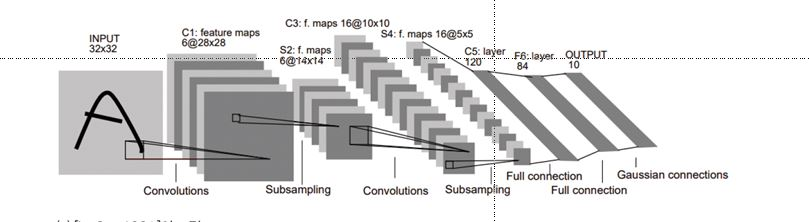

In [10]:
# 컨볼류션 신경망은 약어를 이용해서 설계
# 대표적이고 기본적인 컨볼류션은 LeNet-5
# c p c p c fc fc
display.Image('E:/1 강남야간/img/031.jpg',width=500, height=500)

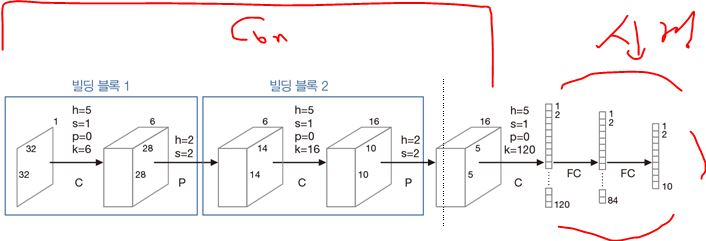

In [11]:
display.Image('E:/1 강남야간/img/032.jpg',width=500, height=500)

In [12]:
#LeNet-5 로  MNIST 인식

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [19]:
# load dataset
(x_train,y_train),(x_test,y_test)  = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype(np.float32)/255.0
x_test =  x_test.reshape(-1,28,28,1).astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [22]:
#LeNet-5 신경망 모델 설계  C P C P C FC FC
# 2차원구조를 유지해야 하므로 reshape(60000,28,28,1)을 사용
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape = (28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

In [23]:
# 학습
cnn.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
hist =cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 23s - loss: 0.1972 - accuracy: 0.9393 - val_loss: 0.0565 - val_accuracy: 0.9820 - 23s/epoch - 49ms/step
Epoch 2/30
469/469 - 22s - loss: 0.0539 - accuracy: 0.9828 - val_loss: 0.0329 - val_accuracy: 0.9885 - 22s/epoch - 47ms/step
Epoch 3/30
469/469 - 22s - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0305 - val_accuracy: 0.9895 - 22s/epoch - 47ms/step
Epoch 4/30
469/469 - 22s - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.0288 - val_accuracy: 0.9899 - 22s/epoch - 47ms/step
Epoch 5/30
469/469 - 22s - loss: 0.0208 - accuracy: 0.9934 - val_loss: 0.0266 - val_accuracy: 0.9911 - 22s/epoch - 47ms/step
Epoch 6/30
469/469 - 22s - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.0335 - val_accuracy: 0.9895 - 22s/epoch - 47ms/step
Epoch 7/30
469/469 - 22s - loss: 0.0149 - accuracy: 0.9952 - val_loss: 0.0271 - val_accuracy: 0.9905 - 22s/epoch - 47ms/step
Epoch 8/30
469/469 - 22s - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0314 - val_accuracy: 0.9917 - 22s/epoch - 47ms/step


In [24]:
# 신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0428 - accuracy: 0.9922


In [25]:
res

[0.04278556630015373, 0.9922000169754028]

<AxesSubplot:>

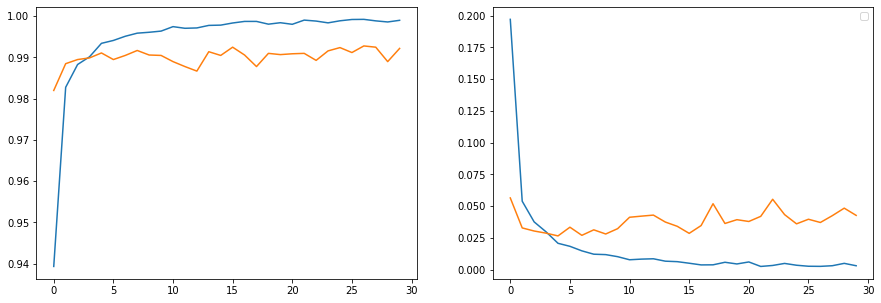

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.lineplot(data=hist.history['accuracy'],ax=ax[0])
sns.lineplot(data=hist.history['val_accuracy'],ax=ax[0])
plt.legend(['accuracy','val_accuracy'])
sns.lineplot(data=hist.history['loss'],ax=ax[1])
sns.lineplot(data=hist.history['val_loss'],ax=ax[1])


In [ ]:
# 위의 컨볼류션 기법에서 좀더 유연한 구조 - 코렙